<a href="https://colab.research.google.com/github/felipegarciaesp/Estadistica/blob/master/Relleno_hidrologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relleno de Datos Hidrológicos con Inteligencia Artifical en Python Keras

Fuente: https://www.youtube.com/watch?v=2vMt1tDM894&list=PLLYhS2D06GnTIdHRaBOB0Iv_14QTsxsZV&index=3

In [46]:
%matplotlib inline
import pandas as pd
import numpy as np
TodasEstaciones = pd.read_csv('Estaciones.csv', sep = ';', index_col = 0)
TodasEstaciones.head()

,Quinta Normal,Las Tortolas,Rungue Embalse,Huechun Andina,Huechun Embalse
Año,,,,,
1943,NaN,NaN,50.0,NaN,NaN
1944,NaN,NaN,63.0,NaN,NaN
1945,NaN,NaN,77.0,NaN,NaN
1946,NaN,NaN,53.0,NaN,NaN
1947,NaN,NaN,41.0,NaN,NaN


array([<Axes: xlabel='Año'>, <Axes: xlabel='Año'>, <Axes: xlabel='Año'>,
       <Axes: xlabel='Año'>, <Axes: xlabel='Año'>], dtype=object)

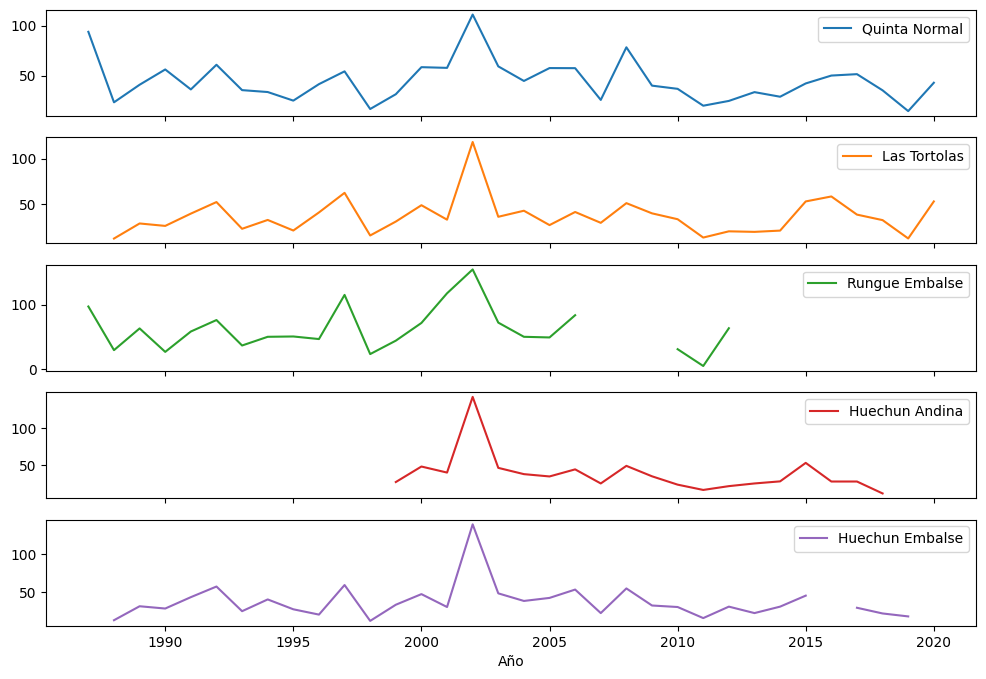

In [47]:
TodasEstaciones.loc['1987':'2020'].plot(subplots = True, figsize = (12, 8))

<Axes: >

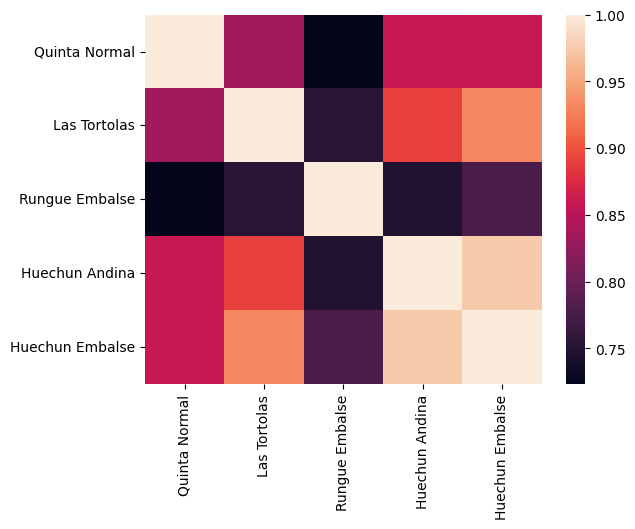

In [48]:
import seaborn as sns
corr = TodasEstaciones.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [49]:
#Definición del dataset de entrenamiento:
X_train = TodasEstaciones.loc['1988':'2005',['Quinta Normal', 'Las Tortolas', 'Huechun Embalse']].astype('float32').values
y_train = TodasEstaciones.loc['1988':'2005','Rungue Embalse'].astype('float32').values

In [50]:
X_train

array([[ 23.2,  11.5,  12.6],
       [ 40.8,  28.2,  31. ],
       [ 56.1,  25.5,  28. ],
       [ 36.1,  39.1,  43. ],
       [ 60.8,  51.9,  57. ],
       [ 35.4,  22.3,  24.5],
       [ 33.5,  32.1,  40. ],
       [ 24.9,  20.4,  27. ],
       [ 41.4,  40.4,  20. ],
       [ 54.2,  62.1,  59. ],
       [ 16.5,  14.9,  11.7],
       [ 31.3,  30.3,  33. ],
       [ 58.4,  48.4,  47. ],
       [ 57.7,  32.4,  30. ],
       [111.1, 118.4, 139. ],
       [ 59.2,  35.6,  48. ],
       [ 44.6,  42.3,  38. ],
       [ 57.5,  26.4,  42. ]], dtype=float32)

In [51]:
y_train

array([ 29.3,  63. ,  26.6,  58.2,  76. ,  36.5,  50. ,  50.5,  46.5,
       115. ,  23.2,  44. ,  71.5, 117.5, 154.5,  72. ,  50. ,  49. ],
      dtype=float32)

In [41]:
#Escalamos la data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

In [42]:
X_train[:20]

array([[-1.1433663 , -1.1383141 , -1.0297095 ],
       [-0.29128814, -0.41824415, -0.35304326],
       [ 0.44943893, -0.53466266, -0.46336928],
       [-0.5188318 ,  0.05174148,  0.08826081],
       [ 0.6769826 ,  0.6036515 ,  0.60311556],
       [-0.55272114, -0.67264014, -0.592083  ],
       [-0.64470696, -0.25008422, -0.0220652 ],
       [-1.0610634 , -0.7545643 , -0.5001446 ],
       [-0.2622399 ,  0.10779497, -0.757572  ],
       [ 0.35745332,  1.0434545 ,  0.6766662 ],
       [-1.4677371 , -0.99171305, -1.0628073 ],
       [-0.75121677, -0.32769653, -0.2794926 ],
       [ 0.56079024,  0.45273864,  0.23536217],
       [ 0.5269007 , -0.23714872, -0.3898186 ],
       [ 3.1121836 ,  3.4709957 ,  3.6186934 ],
       [ 0.599521  , -0.09917136,  0.27213752],
       [-0.10731675,  0.18971898, -0.09561588],
       [ 0.51721793, -0.49585652,  0.05148548]], dtype=float32)

In [52]:
from keras.models import Sequential

from keras.layers import Dense

model = Sequential()

model.add(Dense(12, activation='linear', input_shape=(3,)))
model.add(Dense(8, activation='linear'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                48        
                                                                 
 dense_13 (Dense)            (None, 8)                 104       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 200, verbose = 0)

In [54]:
y_pred = model.predict(X_train)
y_pred

1/1 [==============================] - 0s 63ms/step


array([[ 24.80679 ],
       [ 49.741173],
       [ 57.332138],
       [ 55.640373],
       [ 81.912186],
       [ 41.45632 ],
       [ 49.31385 ],
       [ 34.210846],
       [ 54.585087],
       [ 83.938385],
       [ 22.244898],
       [ 45.299812],
       [ 76.12549 ],
       [ 62.73523 ],
       [170.49458 ],
       [ 69.58018 ],
       [ 61.77967 ],
       [ 61.90138 ]], dtype=float32)

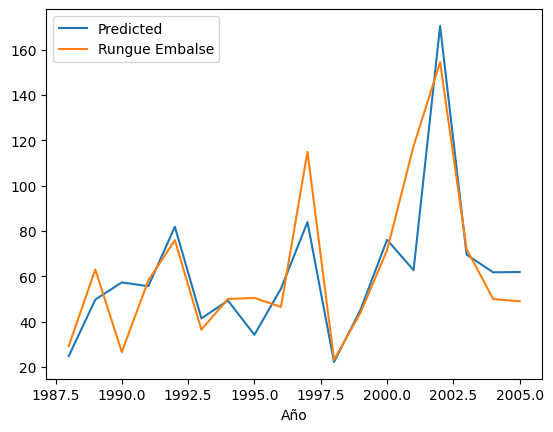

In [60]:
import matplotlib.pyplot as plt
plt.plot(TodasEstaciones.loc['1988':'2005'].index,y_pred,label='Predicted')
TodasEstaciones['Rungue Embalse'].loc['1988':'2005'].plot()
plt.legend()
plt.show()


In [64]:
X_train = TodasEstaciones.loc['1957':'2006','Quinta Normal'].astype('float32').values
y_train = TodasEstaciones.loc['1957':'2006','Rungue Embalse'].astype('float32').values

In [67]:
from keras.models import Sequential

from keras.layers import Dense

model = Sequential()

model.add(Dense(12, activation='linear', input_shape=(1,)))
model.add(Dense(8, activation='linear'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 12)                24        
                                                                 
 dense_22 (Dense)            (None, 8)                 104       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 200, verbose = 0)

In [69]:
y_pred = model.predict(X_train)
y_pred

2/2 [==============================] - 0s 11ms/step


array([[ 82.0149  ],
       [ 64.45555 ],
       [ 63.769638],
       [ 54.166866],
       [ 30.434292],
       [ 83.79827 ],
       [ 81.74054 ],
       [ 48.26802 ],
       [ 70.62876 ],
       [ 64.044014],
       [ 40.722977],
       [ 25.770088],
       [ 37.704964],
       [ 71.8634  ],
       [ 95.32162 ],
       [ 80.64309 ],
       [ 37.842148],
       [ 79.68279 ],
       [ 39.625523],
       [ 36.19596 ],
       [ 47.44492 ],
       [ 72.00059 ],
       [ 86.81629 ],
       [ 43.740997],
       [118.50544 ],
       [ 85.03292 ],
       [ 61.84908 ],
       [107.530846],
       [ 35.510048],
       [ 56.773327],
       [129.7544  ],
       [ 32.90358 ],
       [ 57.04769 ],
       [ 78.03661 ],
       [ 50.600117],
       [ 84.48419 ],
       [ 49.63984 ],
       [ 47.03337 ],
       [ 35.23568 ],
       [ 57.870792],
       [ 75.43015 ],
       [ 23.712353],
       [ 44.015358],
       [ 81.19182 ],
       [ 80.231544],
       [153.48697 ],
       [ 82.289276],
       [ 62.2

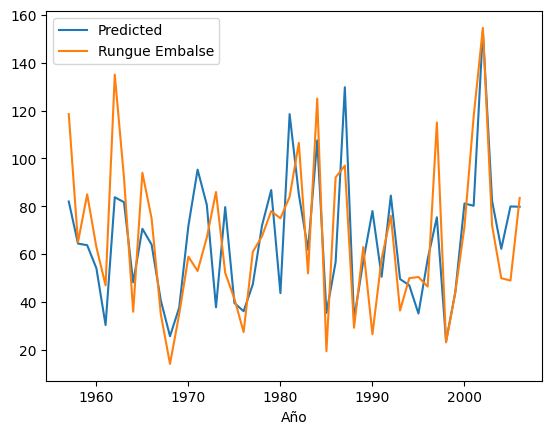

In [70]:
import matplotlib.pyplot as plt
plt.plot(TodasEstaciones.loc['1957':'2006'].index,y_pred,label='Predicted')
TodasEstaciones['Rungue Embalse'].loc['1957':'2006'].plot()
plt.legend()
plt.show()

# Al retomar, revisar con que estaciones se hizo el relleno de cada estación.